In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal 
from scipy.signal import hilbert

# Plots EEG Basal reposo

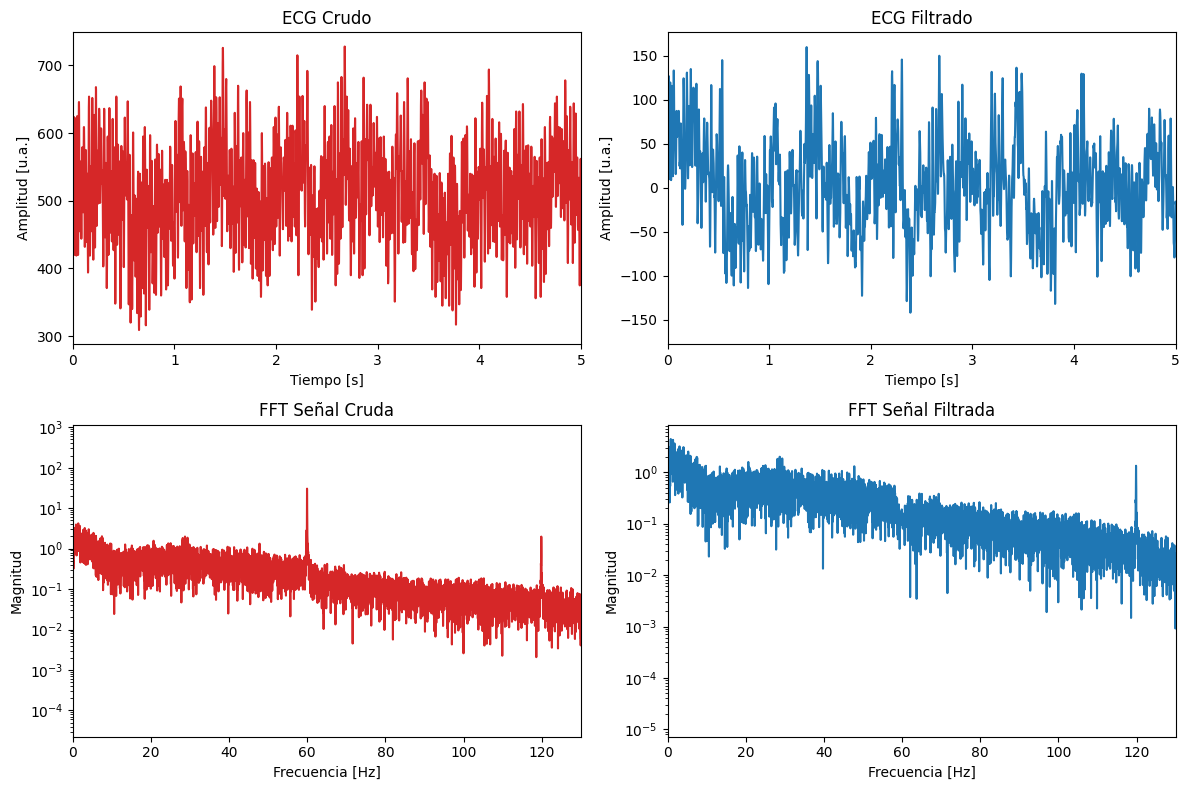

In [13]:
# Cargar archivo
df = pd.read_csv(r"C:\Users\Lenovo\Desktop\PUCP\ISB\Lab5\1 basal reposo.txt",
                 sep="\t", comment="#", header=None)

df.columns = ["nSeq", "I1", "I2", "O1", "O2", "A1", "extra"]

# Extraer señal
eeg_raw = df["A1"].values
fs = 1000  # Hz Extraido de la documentación
N = len(eeg_raw)
t = np.arange(N) / fs

# Denoising / Filtrado

# a) Quitar DC (media)
eeg_dc = eeg_raw - np.mean(eeg_raw)

# b) Notch 60 Hz
notch_freq = 60.0
q = 30.0
b_notch, a_notch = signal.iirnotch(notch_freq, q, fs)
eeg_notch = signal.filtfilt(b_notch, a_notch, eeg_dc)

# c) Bandpass 0.5 - 130 Hz
lowcut = 0.5
highcut = 130.0
b_band, a_band = signal.butter(4, [lowcut/(fs/2), highcut/(fs/2)], btype='band')
eeg_filtered = signal.filtfilt(b_band, a_band, eeg_notch)

# FFT cruda y filtrada

def compute_fft(sig, fs):
    n = len(sig)
    freqs = np.fft.rfftfreq(n, 1/fs)
    fft_vals = np.abs(np.fft.rfft(sig)) / n
    return freqs, fft_vals

freqs_raw, fft_raw = compute_fft(eeg_raw, fs)
freqs_filt, fft_filt = compute_fft(eeg_filtered, fs)

# Plots (2x2)

plt.figure(figsize=(12,8))

# Señal cruda
plt.subplot(2,2,1)
plt.plot(t, eeg_raw, color="tab:red")
plt.title("ECG Crudo")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud [u.a.]")
plt.xlim(0,5)

# Señal filtrada
plt.subplot(2,2,2)
plt.plot(t, eeg_filtered, color="tab:blue")
plt.title("ECG Filtrado")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud [u.a.]")
plt.xlim(0,5)

# FFT cruda
plt.subplot(2,2,3)
plt.semilogy(freqs_raw, fft_raw, color="tab:red")
plt.title("FFT Señal Cruda")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Magnitud")
plt.xlim(0,130)

# FFT filtrada
plt.subplot(2,2,4)
plt.semilogy(freqs_filt, fft_filt, color="tab:blue")
plt.title("FFT Señal Filtrada")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Magnitud")
plt.xlim(0,130)

plt.tight_layout()
plt.show()

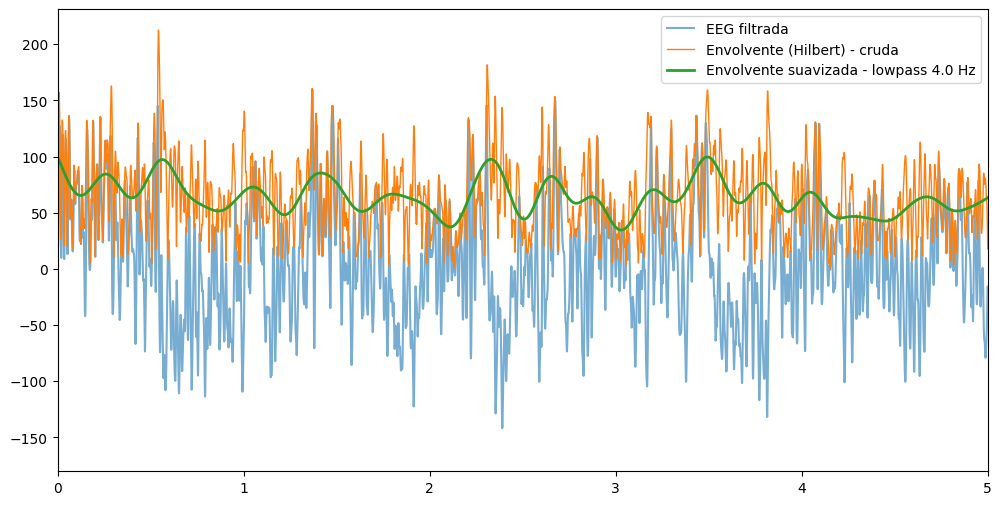

In [17]:
from scipy.signal import hilbert, butter, filtfilt

# 1) Envolvente instantánea (Hilbert)
analytic = hilbert(eeg_filtered)
env_raw = np.abs(analytic)

# 2) Suavizado: Butterworth pasa-bajos
# ajusta cutoff_hz según cómo de "lisa" la quieras (ej. 2-8 Hz)
cutoff_hz = 4.0  
order = 4
b_lp, a_lp = butter(order, cutoff_hz / (fs / 2), btype='low')
env_smooth = filtfilt(b_lp, a_lp, env_raw)

# Plot
plt.figure(figsize=(12,6))
plt.plot(t, eeg_filtered, label='EEG filtrada', alpha=0.6)
plt.plot(t, env_raw, label='Envolvente (Hilbert) - cruda', linewidth=1)
plt.plot(t, env_smooth, label=f'Envolvente suavizada - lowpass {cutoff_hz} Hz', linewidth=2)
plt.xlim(0,5)
plt.legend()
plt.show()


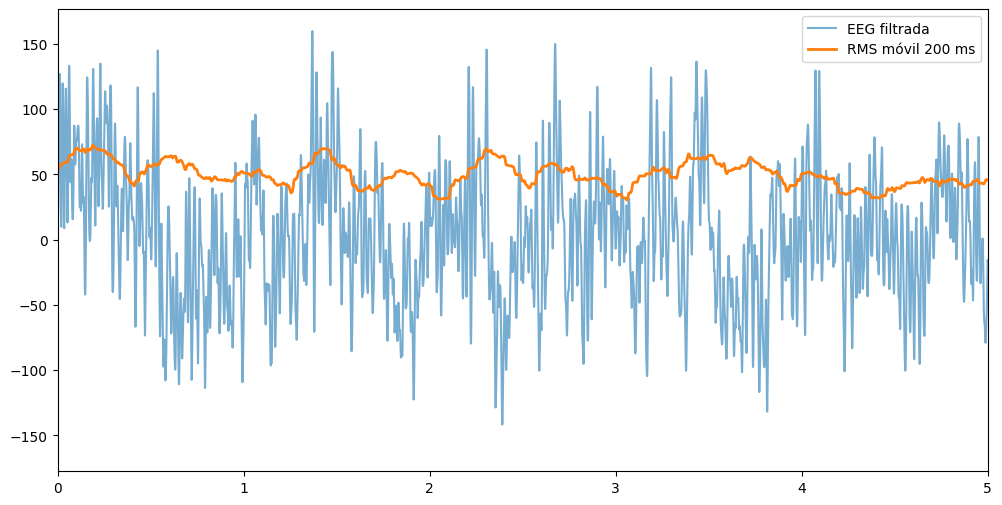

In [18]:
# RMS móvil sobre la señal filtrada (alternativa que mide energía)
window_sec = 0.2  # ej. 200 ms
window_samples = int(window_sec * fs)
if window_samples % 2 == 0:
    window_samples += 1  # preferible impar

# calcular RMS con convolución
eeg_sq = eeg_filtered**2
kernel = np.ones(window_samples) / window_samples
rms = np.sqrt(np.convolve(eeg_sq, kernel, mode='same'))

plt.figure(figsize=(12,6))
plt.plot(t, eeg_filtered, label='EEG filtrada', alpha=0.6)
plt.plot(t, rms, label=f'RMS móvil {window_sec*1000:.0f} ms', linewidth=2)
plt.xlim(0,5)
plt.legend()
plt.show()


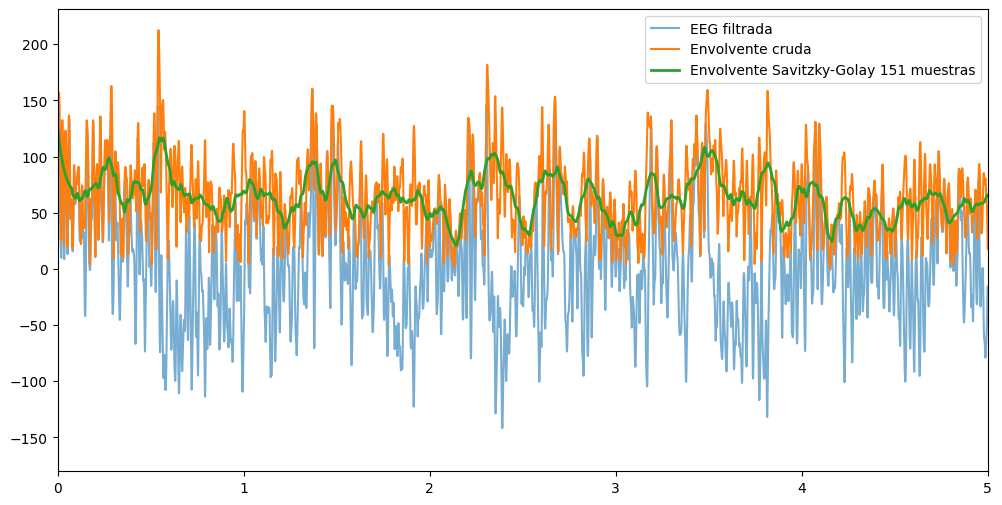

In [ ]:
from scipy.signal import savgol_filter, hilbert

analytic = hilbert(eeg_filtered)
env_raw = np.abs(analytic)

# ventana en muestras (debe ser impar), y orden polinomial (p < ventana)
win_len = int(0.15 * fs)  # ej. 150 ms
if win_len % 2 == 0:
    win_len += 1
polyorder = 3

env_sg = savgol_filter(env_raw, win_len, polyorder)

plt.figure(figsize=(12,6))
plt.plot(t, eeg_filtered, alpha=0.6, label='EEG filtrada')
plt.plot(t, env_raw, label='Envolvente cruda')
plt.plot(t, env_sg, label=f'Envolvente Savitzky-Golay {win_len} muestras', linewidth=2)
plt.xlim(0,5)
plt.legend()
plt.show()

# Plots fijando la vista

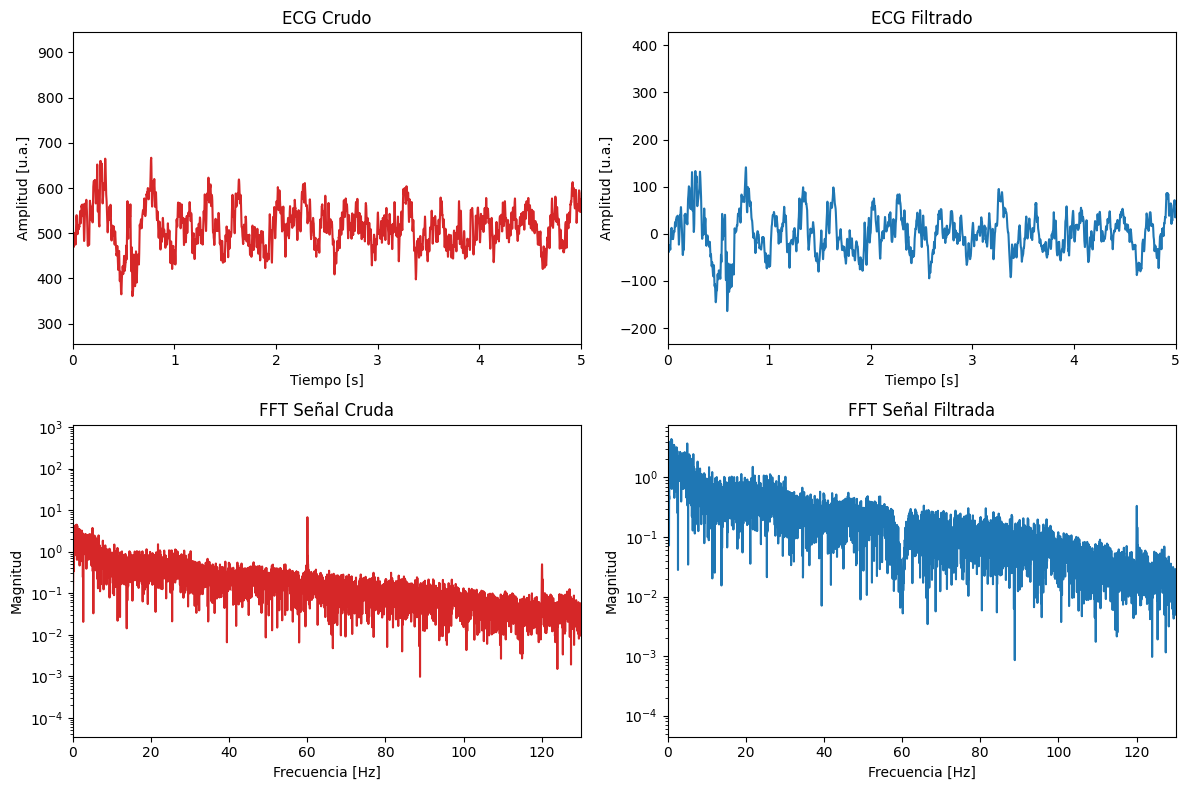

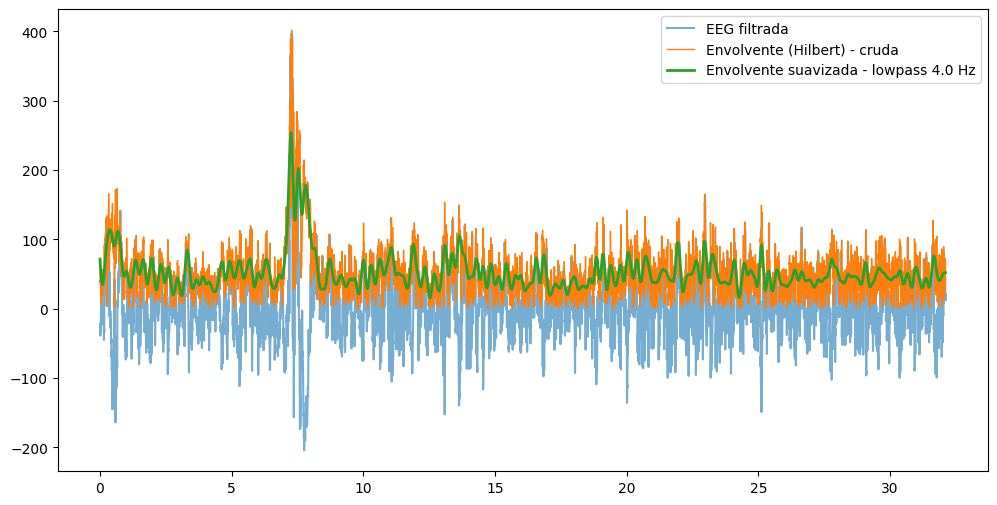

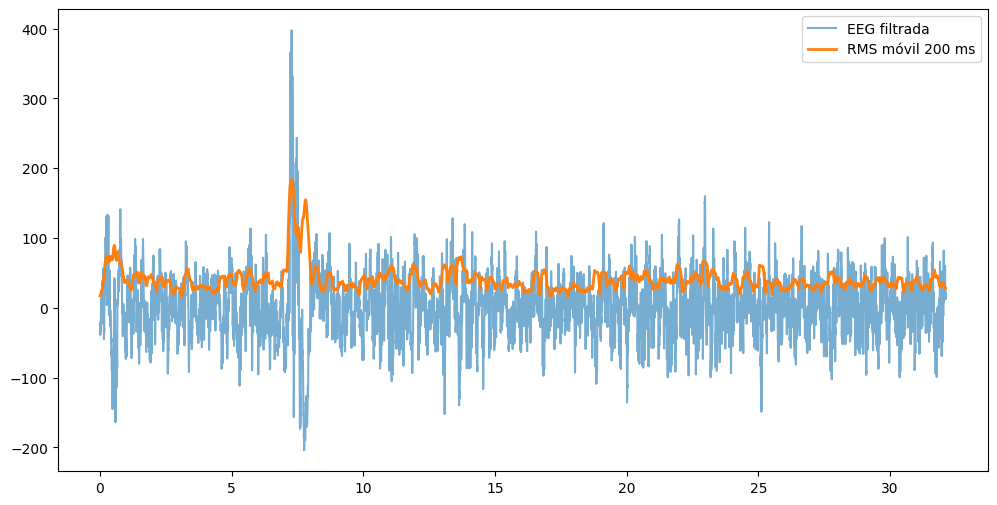

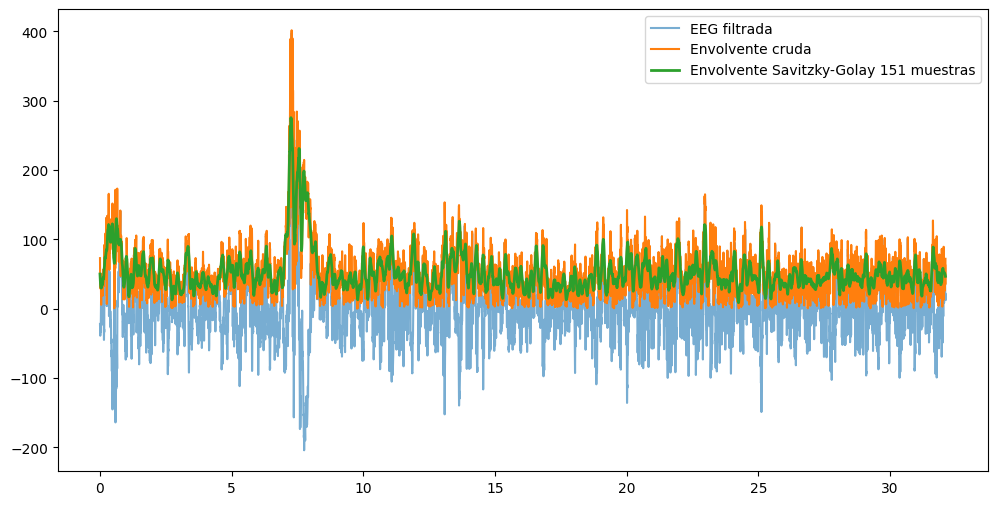

In [5]:
# Cargar archivo
df = pd.read_csv(r"C:\Users\Lenovo\Desktop\PUCP\ISB\Lab5\1er ojos fijos.txt",
                 sep="\t", comment="#", header=None)

df.columns = ["nSeq", "I1", "I2", "O1", "O2", "A1", "extra"]

# Extraer señal
eeg_raw = df["A1"].values
fs = 1000  # Hz Extraido de la documentación
N = len(eeg_raw)
t = np.arange(N) / fs

# Denoising / Filtrado

# a) Quitar DC (media)
eeg_dc = eeg_raw - np.mean(eeg_raw)

# b) Notch 60 Hz
notch_freq = 60.0
q = 30.0
b_notch, a_notch = signal.iirnotch(notch_freq, q, fs)
eeg_notch = signal.filtfilt(b_notch, a_notch, eeg_dc)

# c) Bandpass 0.5 - 130 Hz
lowcut = 0.5
highcut = 130.0
b_band, a_band = signal.butter(4, [lowcut/(fs/2), highcut/(fs/2)], btype='band')
eeg_filtered = signal.filtfilt(b_band, a_band, eeg_notch)

# FFT cruda y filtrada

def compute_fft(sig, fs):
    n = len(sig)
    freqs = np.fft.rfftfreq(n, 1/fs)
    fft_vals = np.abs(np.fft.rfft(sig)) / n
    return freqs, fft_vals

freqs_raw, fft_raw = compute_fft(eeg_raw, fs)
freqs_filt, fft_filt = compute_fft(eeg_filtered, fs)

# Plots (2x2)

plt.figure(figsize=(12,8))

# Señal cruda
plt.subplot(2,2,1)
plt.plot(t, eeg_raw, color="tab:red")
plt.title("ECG Crudo")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud [u.a.]")
plt.xlim(0,5)

# Señal filtrada
plt.subplot(2,2,2)
plt.plot(t, eeg_filtered, color="tab:blue")
plt.title("ECG Filtrado")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud [u.a.]")
plt.xlim(0,5)

# FFT cruda
plt.subplot(2,2,3)
plt.semilogy(freqs_raw, fft_raw, color="tab:red")
plt.title("FFT Señal Cruda")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Magnitud")
plt.xlim(0,130)

# FFT filtrada
plt.subplot(2,2,4)
plt.semilogy(freqs_filt, fft_filt, color="tab:blue")
plt.title("FFT Señal Filtrada")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Magnitud")
plt.xlim(0,130)

plt.tight_layout()
plt.show()

from scipy.signal import hilbert, butter, filtfilt

# 1) Envolvente instantánea (Hilbert)
analytic = hilbert(eeg_filtered)
env_raw = np.abs(analytic)

# 2) Suavizado: Butterworth pasa-bajos
# ajusta cutoff_hz según cómo de "lisa" la quieras (ej. 2-8 Hz)
cutoff_hz = 4.0  
order = 4
b_lp, a_lp = butter(order, cutoff_hz / (fs / 2), btype='low')
env_smooth = filtfilt(b_lp, a_lp, env_raw)

# Plot
plt.figure(figsize=(12,6))
plt.plot(t, eeg_filtered, label='EEG filtrada', alpha=0.6)
plt.plot(t, env_raw, label='Envolvente (Hilbert) - cruda', linewidth=1)
plt.plot(t, env_smooth, label=f'Envolvente suavizada - lowpass {cutoff_hz} Hz', linewidth=2)
plt.legend()
plt.show()

# RMS móvil sobre la señal filtrada (alternativa que mide energía)
window_sec = 0.2  # ej. 200 ms
window_samples = int(window_sec * fs)
if window_samples % 2 == 0:
    window_samples += 1  # preferible impar

# calcular RMS con convolución
eeg_sq = eeg_filtered**2
kernel = np.ones(window_samples) / window_samples
rms = np.sqrt(np.convolve(eeg_sq, kernel, mode='same'))

plt.figure(figsize=(12,6))
plt.plot(t, eeg_filtered, label='EEG filtrada', alpha=0.6)
plt.plot(t, rms, label=f'RMS móvil {window_sec*1000:.0f} ms', linewidth=2)
plt.legend()
plt.show()

from scipy.signal import savgol_filter, hilbert

analytic = hilbert(eeg_filtered)
env_raw = np.abs(analytic)

# ventana en muestras (debe ser impar), y orden polinomial (p < ventana)
win_len = int(0.15 * fs)  # ej. 150 ms
if win_len % 2 == 0:
    win_len += 1
polyorder = 3

env_sg = savgol_filter(env_raw, win_len, polyorder)

plt.figure(figsize=(12,6))
plt.plot(t, eeg_filtered, alpha=0.6, label='EEG filtrada')
plt.plot(t, env_raw, label='Envolvente cruda')
plt.plot(t, env_sg, label=f'Envolvente Savitzky-Golay {win_len} muestras', linewidth=2)
plt.legend()
plt.show()


# Plots parpadeo cada 3 segundos

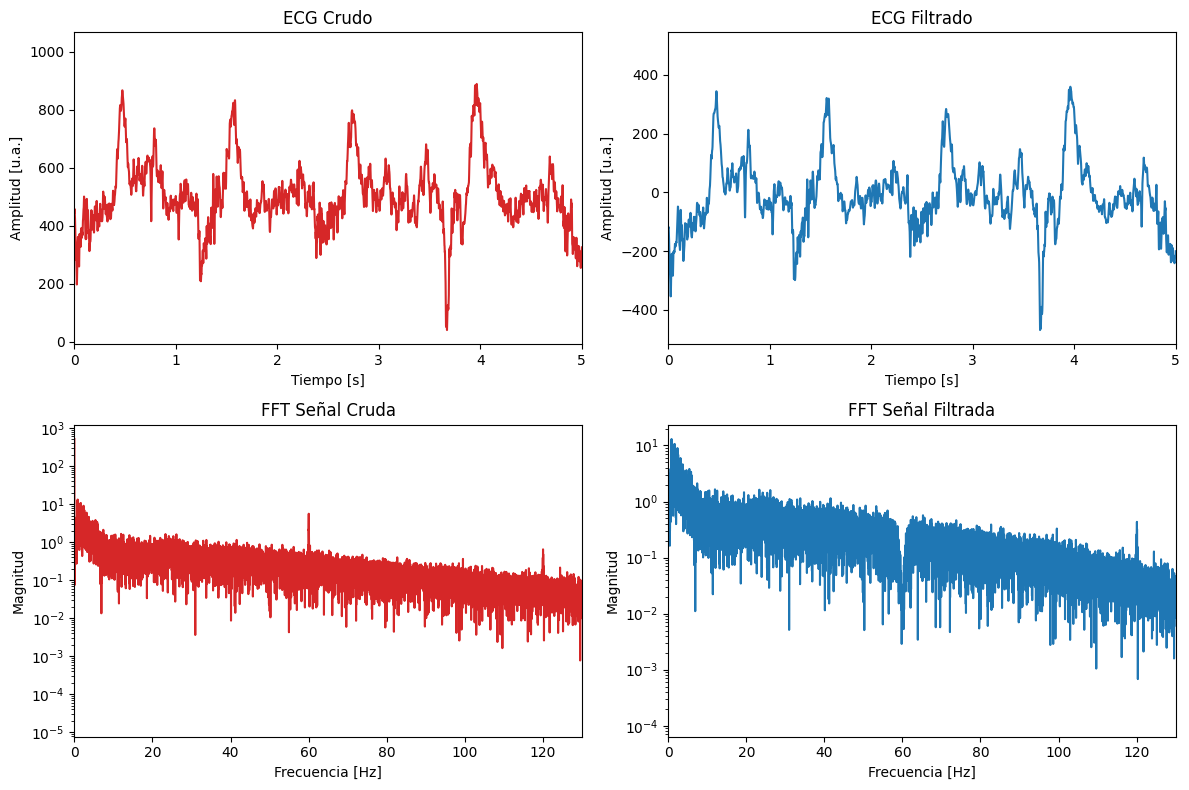

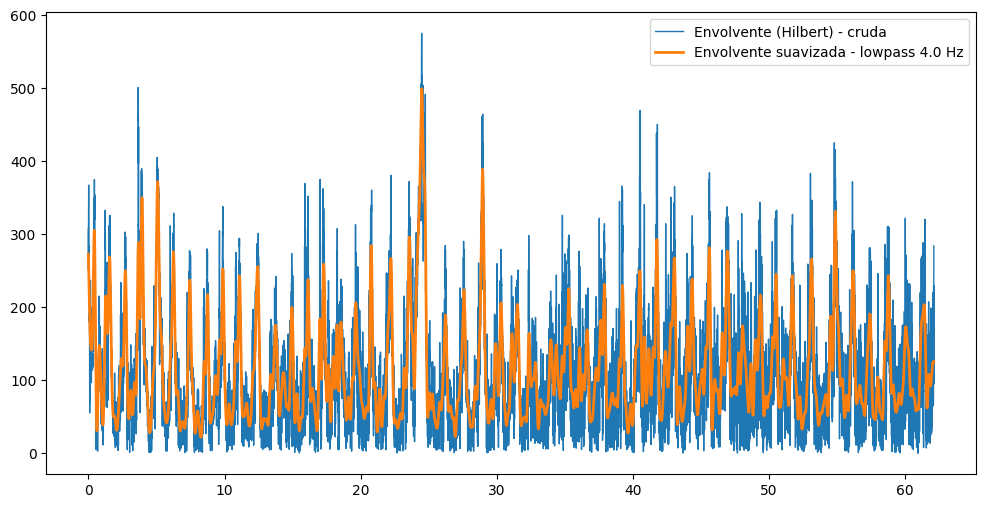

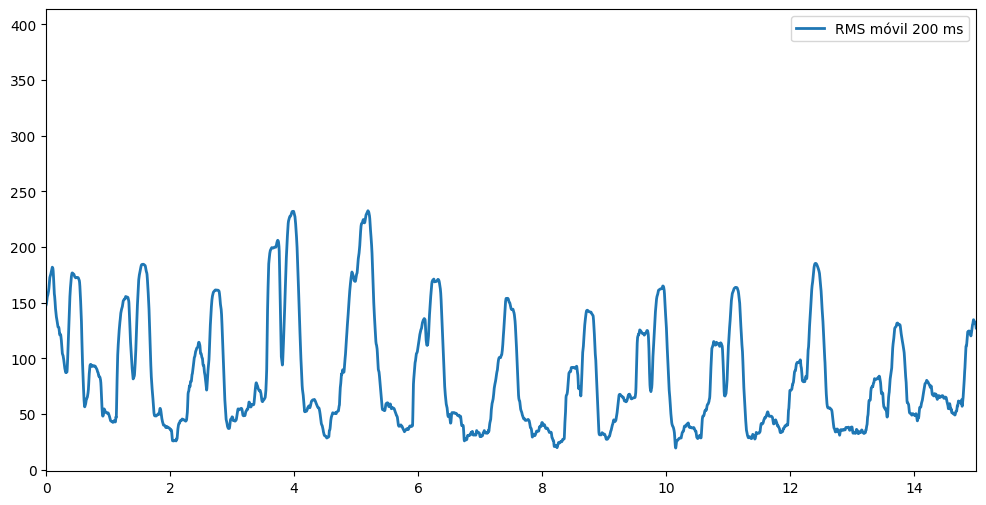

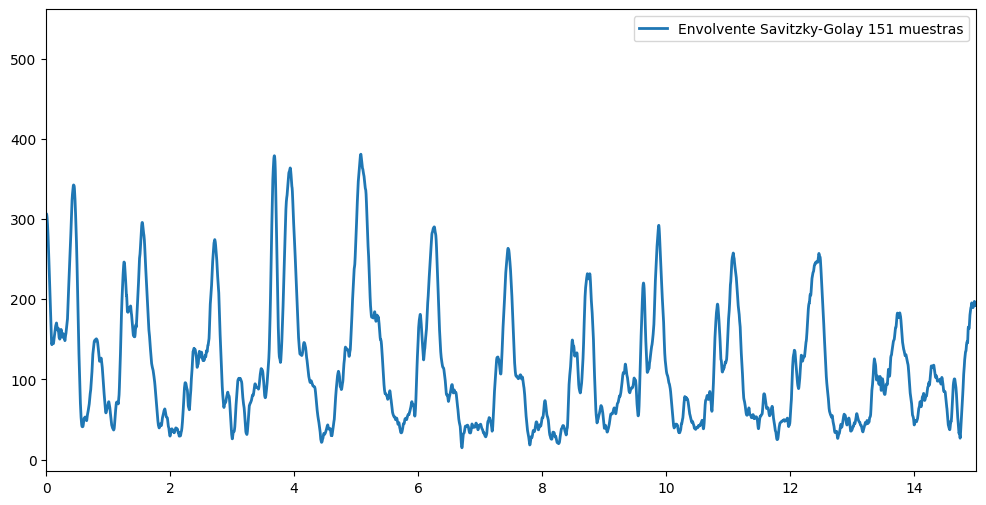

In [10]:
# Cargar archivo
df = pd.read_csv(r"C:\Users\Lenovo\Desktop\PUCP\ISB\Lab5\3er parpadeo cada 2 sec.txt",
                 sep="\t", comment="#", header=None)

df.columns = ["nSeq", "I1", "I2", "O1", "O2", "A1", "extra"]

# Extraer señal
eeg_raw = df["A1"].values
fs = 1000  # Hz Extraido de la documentación
N = len(eeg_raw)
t = np.arange(N) / fs

# Denoising / Filtrado

# a) Quitar DC (media)
eeg_dc = eeg_raw - np.mean(eeg_raw)

# b) Notch 60 Hz
notch_freq = 60.0
q = 30.0
b_notch, a_notch = signal.iirnotch(notch_freq, q, fs)
eeg_notch = signal.filtfilt(b_notch, a_notch, eeg_dc)

# c) Bandpass 0.5 - 130 Hz
lowcut = 0.5
highcut = 130.0
b_band, a_band = signal.butter(4, [lowcut/(fs/2), highcut/(fs/2)], btype='band')
eeg_filtered = signal.filtfilt(b_band, a_band, eeg_notch)

# FFT cruda y filtrada

def compute_fft(sig, fs):
    n = len(sig)
    freqs = np.fft.rfftfreq(n, 1/fs)
    fft_vals = np.abs(np.fft.rfft(sig)) / n
    return freqs, fft_vals

freqs_raw, fft_raw = compute_fft(eeg_raw, fs)
freqs_filt, fft_filt = compute_fft(eeg_filtered, fs)

# Plots (2x2)

plt.figure(figsize=(12,8))

# Señal cruda
plt.subplot(2,2,1)
plt.plot(t, eeg_raw, color="tab:red")
plt.title("ECG Crudo")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud [u.a.]")
plt.xlim(0,5)

# Señal filtrada
plt.subplot(2,2,2)
plt.plot(t, eeg_filtered, color="tab:blue")
plt.title("ECG Filtrado")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud [u.a.]")
plt.xlim(0,5)

# FFT cruda
plt.subplot(2,2,3)
plt.semilogy(freqs_raw, fft_raw, color="tab:red")
plt.title("FFT Señal Cruda")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Magnitud")
plt.xlim(0,130)

# FFT filtrada
plt.subplot(2,2,4)
plt.semilogy(freqs_filt, fft_filt, color="tab:blue")
plt.title("FFT Señal Filtrada")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Magnitud")
plt.xlim(0,130)

plt.tight_layout()
plt.show()

from scipy.signal import hilbert, butter, filtfilt

# 1) Envolvente instantánea (Hilbert)
analytic = hilbert(eeg_filtered)
env_raw = np.abs(analytic)

# 2) Suavizado: Butterworth pasa-bajos
# ajusta cutoff_hz según cómo de "lisa" la quieras (ej. 2-8 Hz)
cutoff_hz = 4.0  
order = 4
b_lp, a_lp = butter(order, cutoff_hz / (fs / 2), btype='low')
env_smooth = filtfilt(b_lp, a_lp, env_raw)

# Plot
plt.figure(figsize=(12,6))
plt.plot(t, env_raw, label='Envolvente (Hilbert) - cruda', linewidth=1)
plt.plot(t, env_smooth, label=f'Envolvente suavizada - lowpass {cutoff_hz} Hz', linewidth=2)
plt.legend()
plt.show()

# RMS móvil sobre la señal filtrada (alternativa que mide energía)
window_sec = 0.2  # ej. 200 ms
window_samples = int(window_sec * fs)
if window_samples % 2 == 0:
    window_samples += 1  # preferible impar

# calcular RMS con convolución
eeg_sq = eeg_filtered**2
kernel = np.ones(window_samples) / window_samples
rms = np.sqrt(np.convolve(eeg_sq, kernel, mode='same'))

plt.figure(figsize=(12,6))
plt.plot(t, rms, label=f'RMS móvil {window_sec*1000:.0f} ms', linewidth=2)
plt.legend()
plt.xlim(0,15)
plt.show()

from scipy.signal import savgol_filter, hilbert

analytic = hilbert(eeg_filtered)
env_raw = np.abs(analytic)

# ventana en muestras (debe ser impar), y orden polinomial (p < ventana)
win_len = int(0.15 * fs)  # ej. 150 ms
if win_len % 2 == 0:
    win_len += 1
polyorder = 3

env_sg = savgol_filter(env_raw, win_len, polyorder)

plt.figure(figsize=(12,6))
plt.plot(t, env_sg, label=f'Envolvente Savitzky-Golay {win_len} muestras', linewidth=2)
plt.legend()
plt.xlim(0,15)
plt.show()


# Plots EEG restando 100 - 7

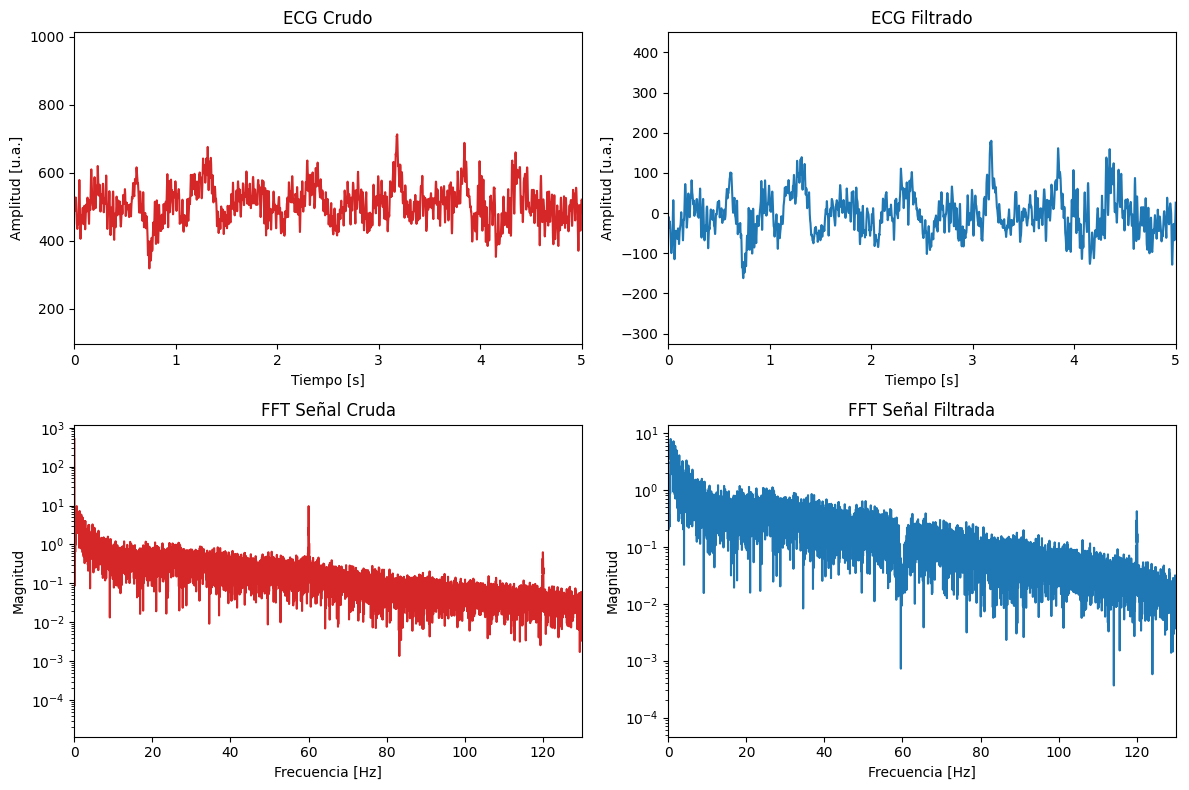

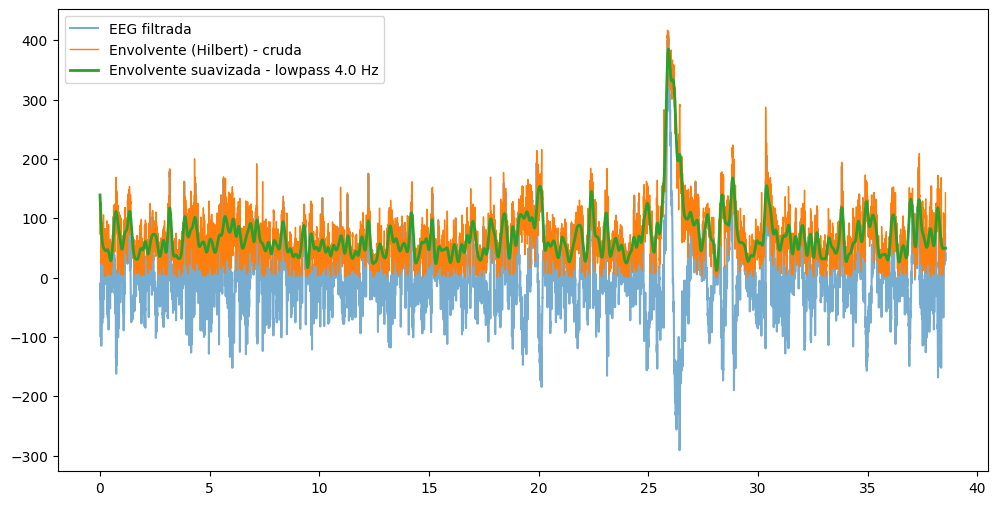

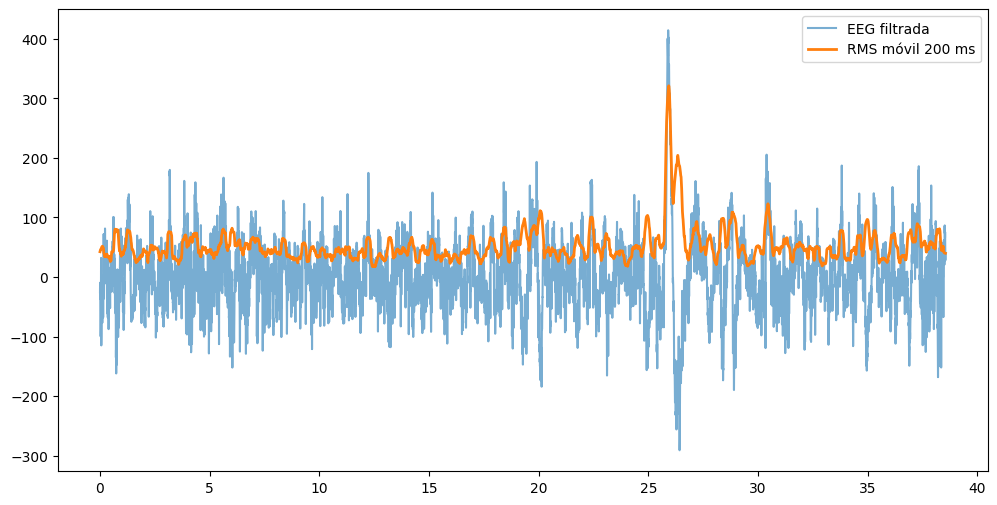

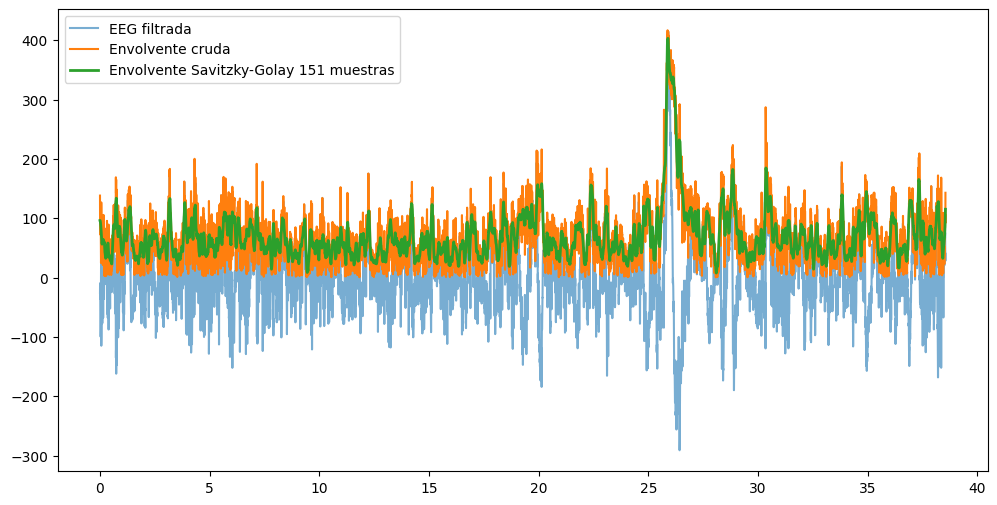

In [6]:
# Cargar archivo
df = pd.read_csv(r"C:\Users\Lenovo\Desktop\PUCP\ISB\Lab5\1er 100-7.txt",
                 sep="\t", comment="#", header=None)

df.columns = ["nSeq", "I1", "I2", "O1", "O2", "A1", "extra"]

# Extraer señal
eeg_raw = df["A1"].values
fs = 1000  # Hz Extraido de la documentación
N = len(eeg_raw)
t = np.arange(N) / fs

# Denoising / Filtrado

# a) Quitar DC (media)
eeg_dc = eeg_raw - np.mean(eeg_raw)

# b) Notch 60 Hz
notch_freq = 60.0
q = 30.0
b_notch, a_notch = signal.iirnotch(notch_freq, q, fs)
eeg_notch = signal.filtfilt(b_notch, a_notch, eeg_dc)

# c) Bandpass 0.5 - 130 Hz
lowcut = 0.5
highcut = 130.0
b_band, a_band = signal.butter(4, [lowcut/(fs/2), highcut/(fs/2)], btype='band')
eeg_filtered = signal.filtfilt(b_band, a_band, eeg_notch)

# FFT cruda y filtrada

def compute_fft(sig, fs):
    n = len(sig)
    freqs = np.fft.rfftfreq(n, 1/fs)
    fft_vals = np.abs(np.fft.rfft(sig)) / n
    return freqs, fft_vals

freqs_raw, fft_raw = compute_fft(eeg_raw, fs)
freqs_filt, fft_filt = compute_fft(eeg_filtered, fs)

# Plots (2x2)

plt.figure(figsize=(12,8))

# Señal cruda
plt.subplot(2,2,1)
plt.plot(t, eeg_raw, color="tab:red")
plt.title("ECG Crudo")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud [u.a.]")
plt.xlim(0,5)

# Señal filtrada
plt.subplot(2,2,2)
plt.plot(t, eeg_filtered, color="tab:blue")
plt.title("ECG Filtrado")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud [u.a.]")
plt.xlim(0,5)

# FFT cruda
plt.subplot(2,2,3)
plt.semilogy(freqs_raw, fft_raw, color="tab:red")
plt.title("FFT Señal Cruda")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Magnitud")
plt.xlim(0,130)

# FFT filtrada
plt.subplot(2,2,4)
plt.semilogy(freqs_filt, fft_filt, color="tab:blue")
plt.title("FFT Señal Filtrada")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Magnitud")
plt.xlim(0,130)

plt.tight_layout()
plt.show()

from scipy.signal import hilbert, butter, filtfilt

# 1) Envolvente instantánea (Hilbert)
analytic = hilbert(eeg_filtered)
env_raw = np.abs(analytic)

# 2) Suavizado: Butterworth pasa-bajos
# ajusta cutoff_hz según cómo de "lisa" la quieras (ej. 2-8 Hz)
cutoff_hz = 4.0  
order = 4
b_lp, a_lp = butter(order, cutoff_hz / (fs / 2), btype='low')
env_smooth = filtfilt(b_lp, a_lp, env_raw)

# Plot
plt.figure(figsize=(12,6))
plt.plot(t, eeg_filtered, label='EEG filtrada', alpha=0.6)
plt.plot(t, env_raw, label='Envolvente (Hilbert) - cruda', linewidth=1)
plt.plot(t, env_smooth, label=f'Envolvente suavizada - lowpass {cutoff_hz} Hz', linewidth=2)
plt.legend()
plt.show()

# RMS móvil sobre la señal filtrada (alternativa que mide energía)
window_sec = 0.2  # ej. 200 ms
window_samples = int(window_sec * fs)
if window_samples % 2 == 0:
    window_samples += 1  # preferible impar

# calcular RMS con convolución
eeg_sq = eeg_filtered**2
kernel = np.ones(window_samples) / window_samples
rms = np.sqrt(np.convolve(eeg_sq, kernel, mode='same'))

plt.figure(figsize=(12,6))
plt.plot(t, eeg_filtered, label='EEG filtrada', alpha=0.6)
plt.plot(t, rms, label=f'RMS móvil {window_sec*1000:.0f} ms', linewidth=2)
plt.legend()
plt.show()

from scipy.signal import savgol_filter, hilbert

analytic = hilbert(eeg_filtered)
env_raw = np.abs(analytic)

# ventana en muestras (debe ser impar), y orden polinomial (p < ventana)
win_len = int(0.15 * fs)  # ej. 150 ms
if win_len % 2 == 0:
    win_len += 1
polyorder = 3

env_sg = savgol_filter(env_raw, win_len, polyorder)

plt.figure(figsize=(12,6))
plt.plot(t, eeg_filtered, alpha=0.6, label='EEG filtrada')
plt.plot(t, env_raw, label='Envolvente cruda')
plt.plot(t, env_sg, label=f'Envolvente Savitzky-Golay {win_len} muestras', linewidth=2)
plt.legend()
plt.show()


# Plots EEG 30 segundos ojos abiertos 30 segundos ojos cerrados


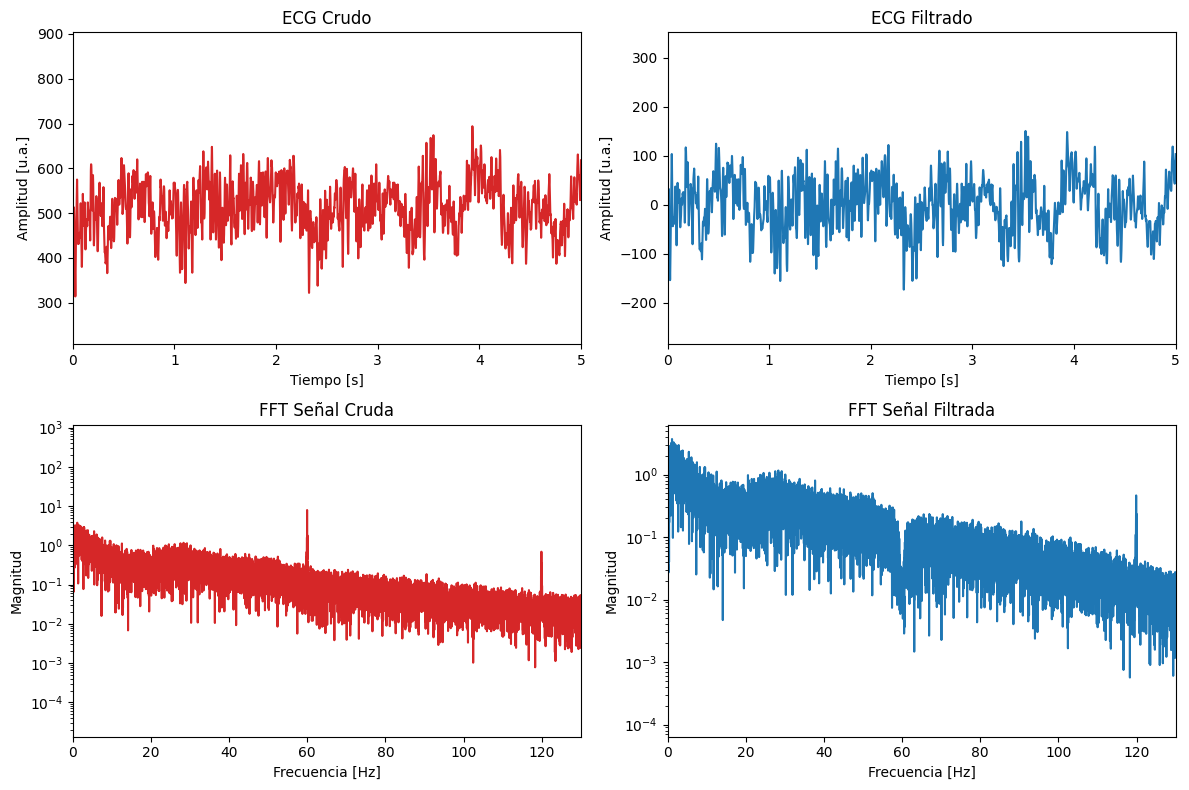

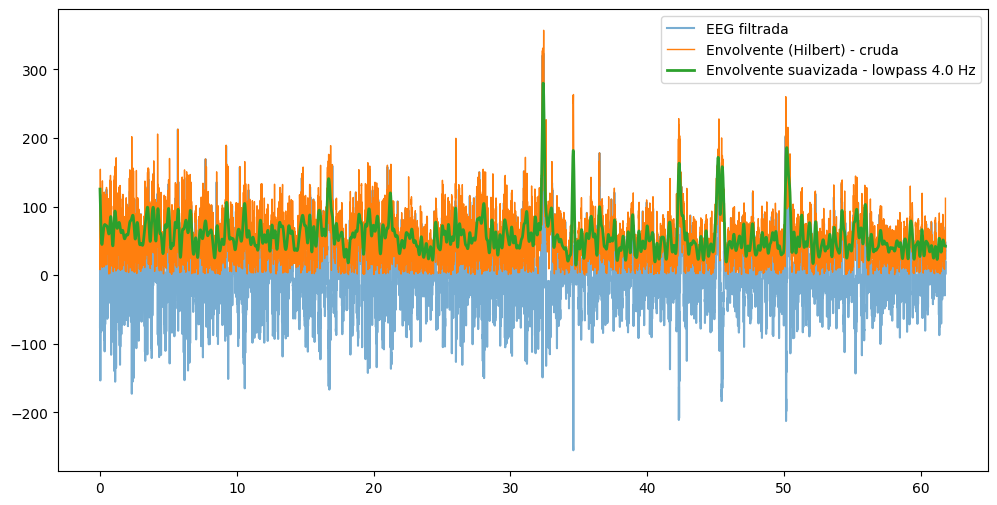

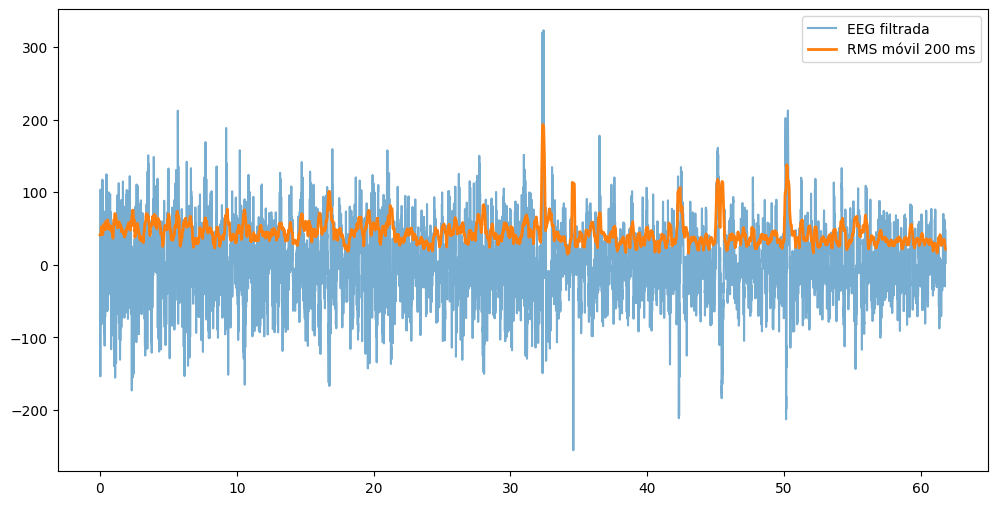

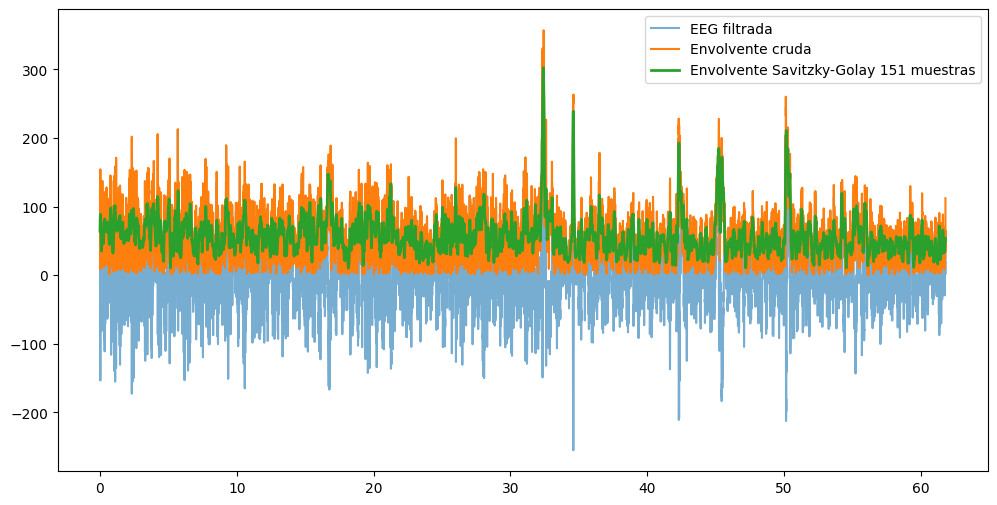

In [4]:
# Cargar archivo
df = pd.read_csv(r"C:\Users\Lenovo\Desktop\PUCP\ISB\Lab5\1 30 sec cerrados y 30 sec abiertos fijos.txt",
                 sep="\t", comment="#", header=None)

df.columns = ["nSeq", "I1", "I2", "O1", "O2", "A1", "extra"]

# Extraer señal
eeg_raw = df["A1"].values
fs = 1000  # Hz Extraido de la documentación
N = len(eeg_raw)
t = np.arange(N) / fs

# Denoising / Filtrado

# a) Quitar DC (media)
eeg_dc = eeg_raw - np.mean(eeg_raw)

# b) Notch 60 Hz
notch_freq = 60.0
q = 30.0
b_notch, a_notch = signal.iirnotch(notch_freq, q, fs)
eeg_notch = signal.filtfilt(b_notch, a_notch, eeg_dc)

# c) Bandpass 0.5 - 130 Hz
lowcut = 0.5
highcut = 130.0
b_band, a_band = signal.butter(4, [lowcut/(fs/2), highcut/(fs/2)], btype='band')
eeg_filtered = signal.filtfilt(b_band, a_band, eeg_notch)

# FFT cruda y filtrada

def compute_fft(sig, fs):
    n = len(sig)
    freqs = np.fft.rfftfreq(n, 1/fs)
    fft_vals = np.abs(np.fft.rfft(sig)) / n
    return freqs, fft_vals

freqs_raw, fft_raw = compute_fft(eeg_raw, fs)
freqs_filt, fft_filt = compute_fft(eeg_filtered, fs)

# Plots (2x2)

plt.figure(figsize=(12,8))

# Señal cruda
plt.subplot(2,2,1)
plt.plot(t, eeg_raw, color="tab:red")
plt.title("ECG Crudo")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud [u.a.]")
plt.xlim(0,5)

# Señal filtrada
plt.subplot(2,2,2)
plt.plot(t, eeg_filtered, color="tab:blue")
plt.title("ECG Filtrado")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud [u.a.]")
plt.xlim(0,5)

# FFT cruda
plt.subplot(2,2,3)
plt.semilogy(freqs_raw, fft_raw, color="tab:red")
plt.title("FFT Señal Cruda")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Magnitud")
plt.xlim(0,130)

# FFT filtrada
plt.subplot(2,2,4)
plt.semilogy(freqs_filt, fft_filt, color="tab:blue")
plt.title("FFT Señal Filtrada")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Magnitud")
plt.xlim(0,130)

plt.tight_layout()
plt.show()

from scipy.signal import hilbert, butter, filtfilt

# 1) Envolvente instantánea (Hilbert)
analytic = hilbert(eeg_filtered)
env_raw = np.abs(analytic)

# 2) Suavizado: Butterworth pasa-bajos
# ajusta cutoff_hz según cómo de "lisa" la quieras (ej. 2-8 Hz)
cutoff_hz = 4.0  
order = 4
b_lp, a_lp = butter(order, cutoff_hz / (fs / 2), btype='low')
env_smooth = filtfilt(b_lp, a_lp, env_raw)

# Plot
plt.figure(figsize=(12,6))
plt.plot(t, eeg_filtered, label='EEG filtrada', alpha=0.6)
plt.plot(t, env_raw, label='Envolvente (Hilbert) - cruda', linewidth=1)
plt.plot(t, env_smooth, label=f'Envolvente suavizada - lowpass {cutoff_hz} Hz', linewidth=2)
plt.legend()
plt.show()

# RMS móvil sobre la señal filtrada (alternativa que mide energía)
window_sec = 0.2  # ej. 200 ms
window_samples = int(window_sec * fs)
if window_samples % 2 == 0:
    window_samples += 1  # preferible impar

# calcular RMS con convolución
eeg_sq = eeg_filtered**2
kernel = np.ones(window_samples) / window_samples
rms = np.sqrt(np.convolve(eeg_sq, kernel, mode='same'))

plt.figure(figsize=(12,6))
plt.plot(t, eeg_filtered, label='EEG filtrada', alpha=0.6)
plt.plot(t, rms, label=f'RMS móvil {window_sec*1000:.0f} ms', linewidth=2)
plt.legend()
plt.show()

from scipy.signal import savgol_filter, hilbert

analytic = hilbert(eeg_filtered)
env_raw = np.abs(analytic)

# ventana en muestras (debe ser impar), y orden polinomial (p < ventana)
win_len = int(0.15 * fs)  # ej. 150 ms
if win_len % 2 == 0:
    win_len += 1
polyorder = 3

env_sg = savgol_filter(env_raw, win_len, polyorder)

plt.figure(figsize=(12,6))
plt.plot(t, eeg_filtered, alpha=0.6, label='EEG filtrada')
plt.plot(t, env_raw, label='Envolvente cruda')
plt.plot(t, env_sg, label=f'Envolvente Savitzky-Golay {win_len} muestras', linewidth=2)
plt.legend()
plt.show()


# Plots escuchando huayno

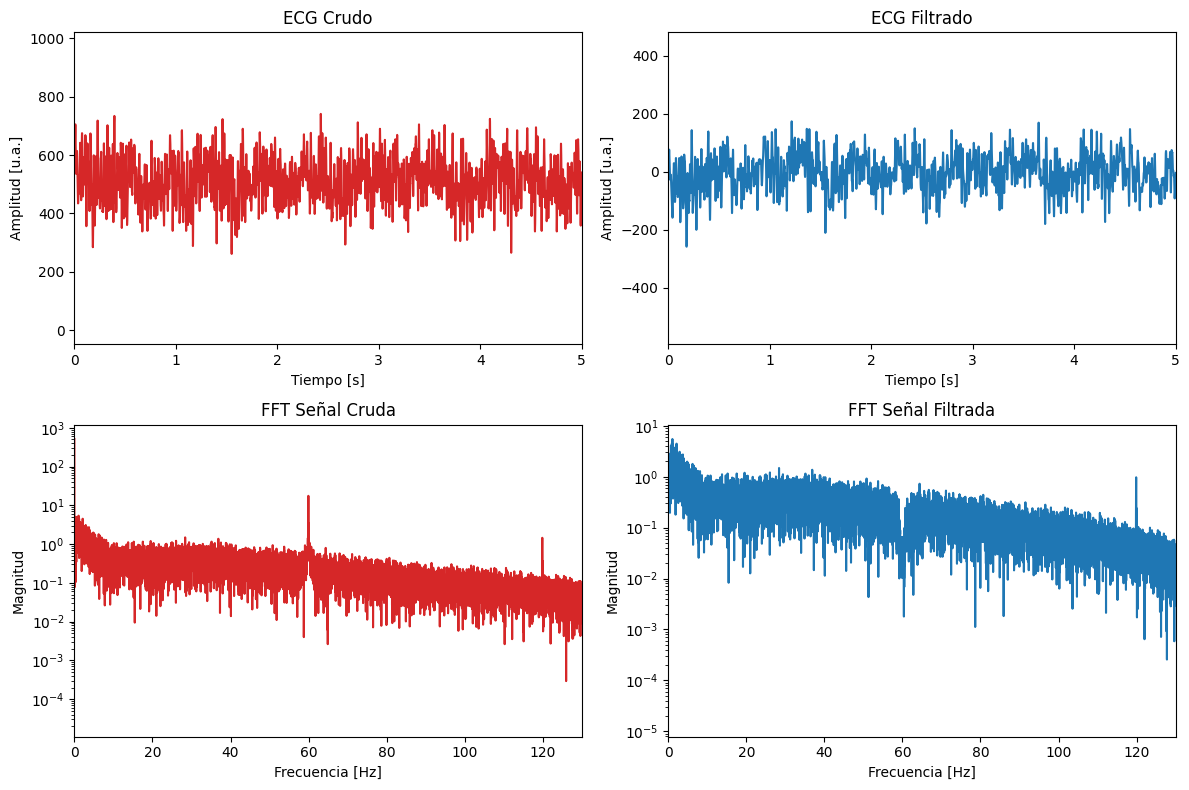

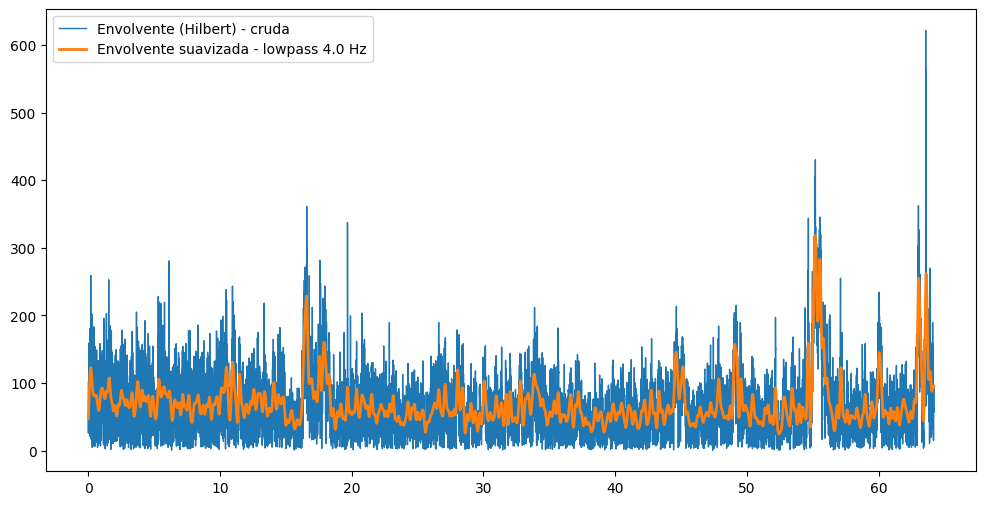

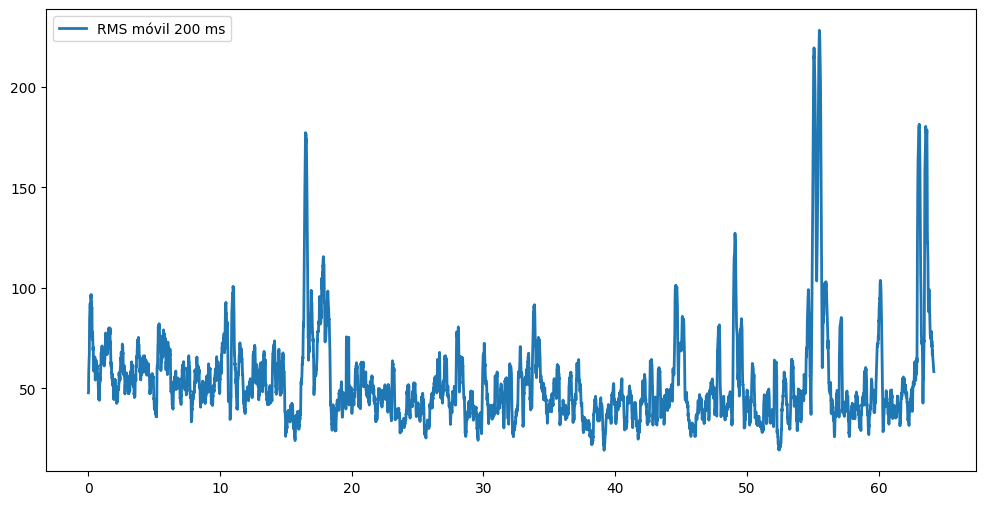

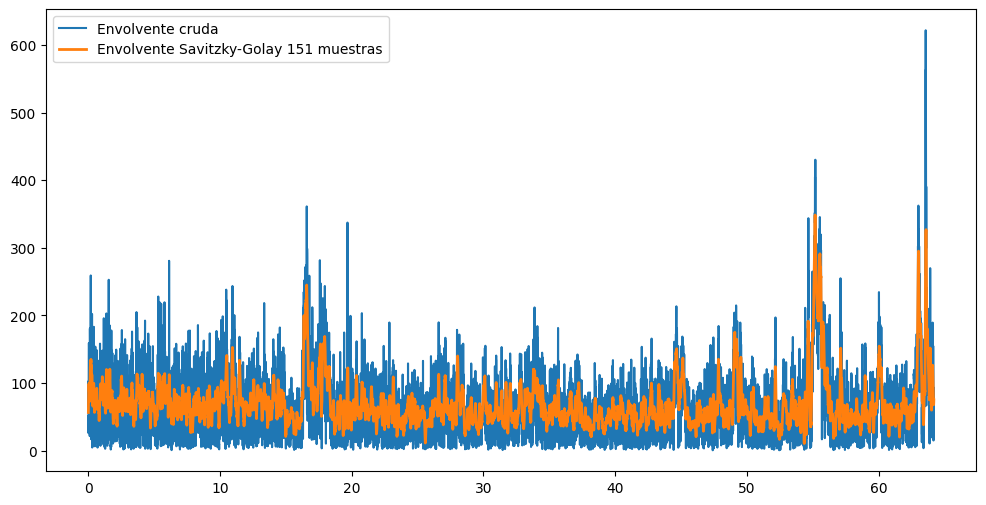

In [12]:
# Cargar archivo
df = pd.read_csv(r"C:\Users\Lenovo\Desktop\PUCP\ISB\Lab5\2da libre huayno.txt",
                 sep="\t", comment="#", header=None)

df.columns = ["nSeq", "I1", "I2", "O1", "O2", "A1", "extra"]

# Extraer señal
eeg_raw = df["A1"].values
fs = 1000  # Hz Extraido de la documentación
N = len(eeg_raw)
t = np.arange(N) / fs

# Denoising / Filtrado

# a) Quitar DC (media)
eeg_dc = eeg_raw - np.mean(eeg_raw)

# b) Notch 60 Hz
notch_freq = 60.0
q = 30.0
b_notch, a_notch = signal.iirnotch(notch_freq, q, fs)
eeg_notch = signal.filtfilt(b_notch, a_notch, eeg_dc)

# c) Bandpass 0.5 - 130 Hz
lowcut = 0.5
highcut = 130.0
b_band, a_band = signal.butter(4, [lowcut/(fs/2), highcut/(fs/2)], btype='band')
eeg_filtered = signal.filtfilt(b_band, a_band, eeg_notch)

# FFT cruda y filtrada

def compute_fft(sig, fs):
    n = len(sig)
    freqs = np.fft.rfftfreq(n, 1/fs)
    fft_vals = np.abs(np.fft.rfft(sig)) / n
    return freqs, fft_vals

freqs_raw, fft_raw = compute_fft(eeg_raw, fs)
freqs_filt, fft_filt = compute_fft(eeg_filtered, fs)

# Plots (2x2)

plt.figure(figsize=(12,8))

# Señal cruda
plt.subplot(2,2,1)
plt.plot(t, eeg_raw, color="tab:red")
plt.title("ECG Crudo")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud [u.a.]")
plt.xlim(0,5)

# Señal filtrada
plt.subplot(2,2,2)
plt.plot(t, eeg_filtered, color="tab:blue")
plt.title("ECG Filtrado")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud [u.a.]")
plt.xlim(0,5)

# FFT cruda
plt.subplot(2,2,3)
plt.semilogy(freqs_raw, fft_raw, color="tab:red")
plt.title("FFT Señal Cruda")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Magnitud")
plt.xlim(0,130)

# FFT filtrada
plt.subplot(2,2,4)
plt.semilogy(freqs_filt, fft_filt, color="tab:blue")
plt.title("FFT Señal Filtrada")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Magnitud")
plt.xlim(0,130)

plt.tight_layout()
plt.show()

from scipy.signal import hilbert, butter, filtfilt

# 1) Envolvente instantánea (Hilbert)
analytic = hilbert(eeg_filtered)
env_raw = np.abs(analytic)

# 2) Suavizado: Butterworth pasa-bajos
# ajusta cutoff_hz según cómo de "lisa" la quieras (ej. 2-8 Hz)
cutoff_hz = 4.0  
order = 4
b_lp, a_lp = butter(order, cutoff_hz / (fs / 2), btype='low')
env_smooth = filtfilt(b_lp, a_lp, env_raw)

# Plot
plt.figure(figsize=(12,6))
plt.plot(t, env_raw, label='Envolvente (Hilbert) - cruda', linewidth=1)
plt.plot(t, env_smooth, label=f'Envolvente suavizada - lowpass {cutoff_hz} Hz', linewidth=2)
plt.legend()
plt.show()

# RMS móvil sobre la señal filtrada (alternativa que mide energía)
window_sec = 0.2  # ej. 200 ms
window_samples = int(window_sec * fs)
if window_samples % 2 == 0:
    window_samples += 1  # preferible impar

# calcular RMS con convolución
eeg_sq = eeg_filtered**2
kernel = np.ones(window_samples) / window_samples
rms = np.sqrt(np.convolve(eeg_sq, kernel, mode='same'))

plt.figure(figsize=(12,6))
plt.plot(t, rms, label=f'RMS móvil {window_sec*1000:.0f} ms', linewidth=2)
plt.legend()
plt.show()

from scipy.signal import savgol_filter, hilbert

analytic = hilbert(eeg_filtered)
env_raw = np.abs(analytic)

# ventana en muestras (debe ser impar), y orden polinomial (p < ventana)
win_len = int(0.15 * fs)  # ej. 150 ms
if win_len % 2 == 0:
    win_len += 1
polyorder = 3

env_sg = savgol_filter(env_raw, win_len, polyorder)

plt.figure(figsize=(12,6))
plt.plot(t, env_raw, label='Envolvente cruda')
plt.plot(t, env_sg, label=f'Envolvente Savitzky-Golay {win_len} muestras', linewidth=2)
plt.legend()
plt.show()
